In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
import pandas as pd
import statsmodels.api as sm


def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [16]:
df = pd.read_excel(r'data_statsproj.xlsx')
print (df)

    Section      Test1      Test2  Gender  SM_hrs  SleepTime  Sleep_hrs  \
0         1  25.000000  64.444444       1     7.0        8.0        7.0   
1         1  94.444444  95.000000       1     7.0        8.0        4.5   
2         1  50.000000  78.333333       0     7.0        9.0        6.5   
3         1  22.000000  82.194444       0     6.0        7.0        6.0   
4         1  69.444444  81.111111       1     5.5        8.5        5.5   
..      ...        ...        ...     ...     ...        ...        ...   
57        4  66.666667  64.444444       1     7.0        9.0        6.0   
58        4  44.444444  81.111111       1     3.5        7.0        8.0   
59        4  41.666700  56.111100       0     3.0        7.0        7.0   
60        4  61.111111  61.666667       0     3.0        7.5        7.5   
61        4  58.333333  70.000000       1     3.0        8.0        6.5   

    Attention  Format  
0          60       0  
1          90       0  
2           5       0  
3  

In [23]:
df

,Section,BusStat1,BusStat2,Gender,SocialMediaHrs,SleepTime,SleepHrs,Attention,Type
0,1,25.000000,64.444444,1,7.0,8.0,7.0,60,0
1,1,94.444444,95.000000,1,7.0,8.0,4.5,90,0
2,1,50.000000,78.333333,0,7.0,9.0,6.5,5,0
3,1,22.000000,82.194444,0,6.0,7.0,6.0,90,0
4,1,69.444444,81.111111,1,5.5,8.5,5.5,30,0
...,...,...,...,...,...,...,...,...,...
57,4,66.666667,64.444444,1,7.0,9.0,6.0,90,1
58,4,44.444444,81.111111,1,3.5,7.0,8.0,90,1
59,4,41.666700,56.111100,0,3.0,7.0,7.0,90,1
60,4,61.111111,61.666667,0,3.0,7.5,7.5,90,1


D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 90.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 90.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 90.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


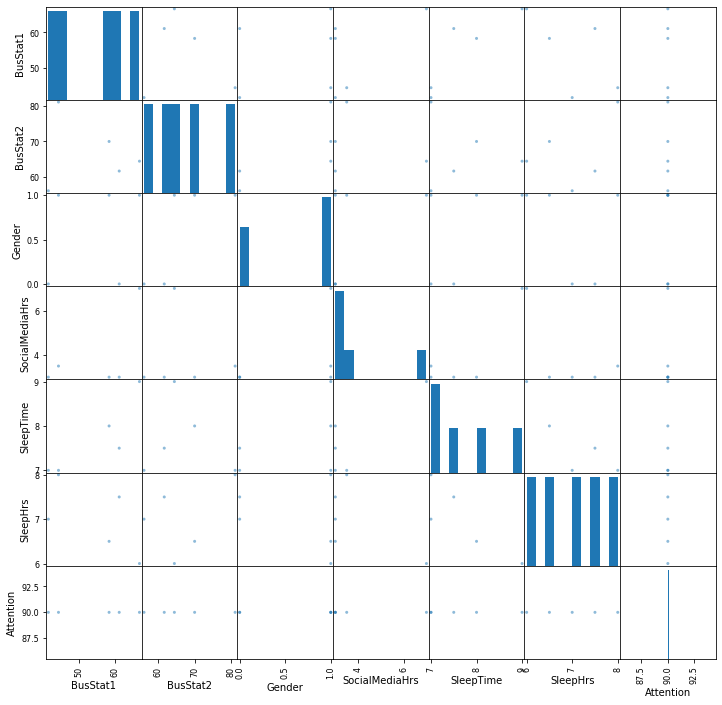

In [113]:
sec=4
pd.plotting.scatter_matrix(df.iloc[:,1:].loc[df.Section==sec],figsize=(12,12))
plt.savefig('statproj_scatter_'+str(sec)+'.png',format='png',dpi=1000)

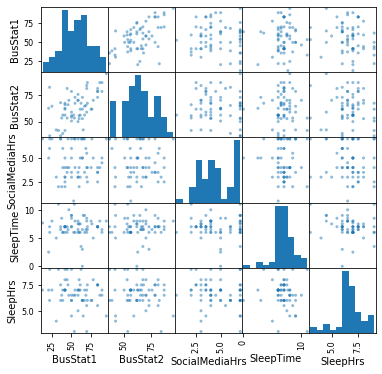

In [331]:
pd.plotting.scatter_matrix(df.iloc[:,[1,2,4,5,6]],figsize=(6,6))
plt.savefig('statproj_scatter_full.png',format='png',dpi=1000)

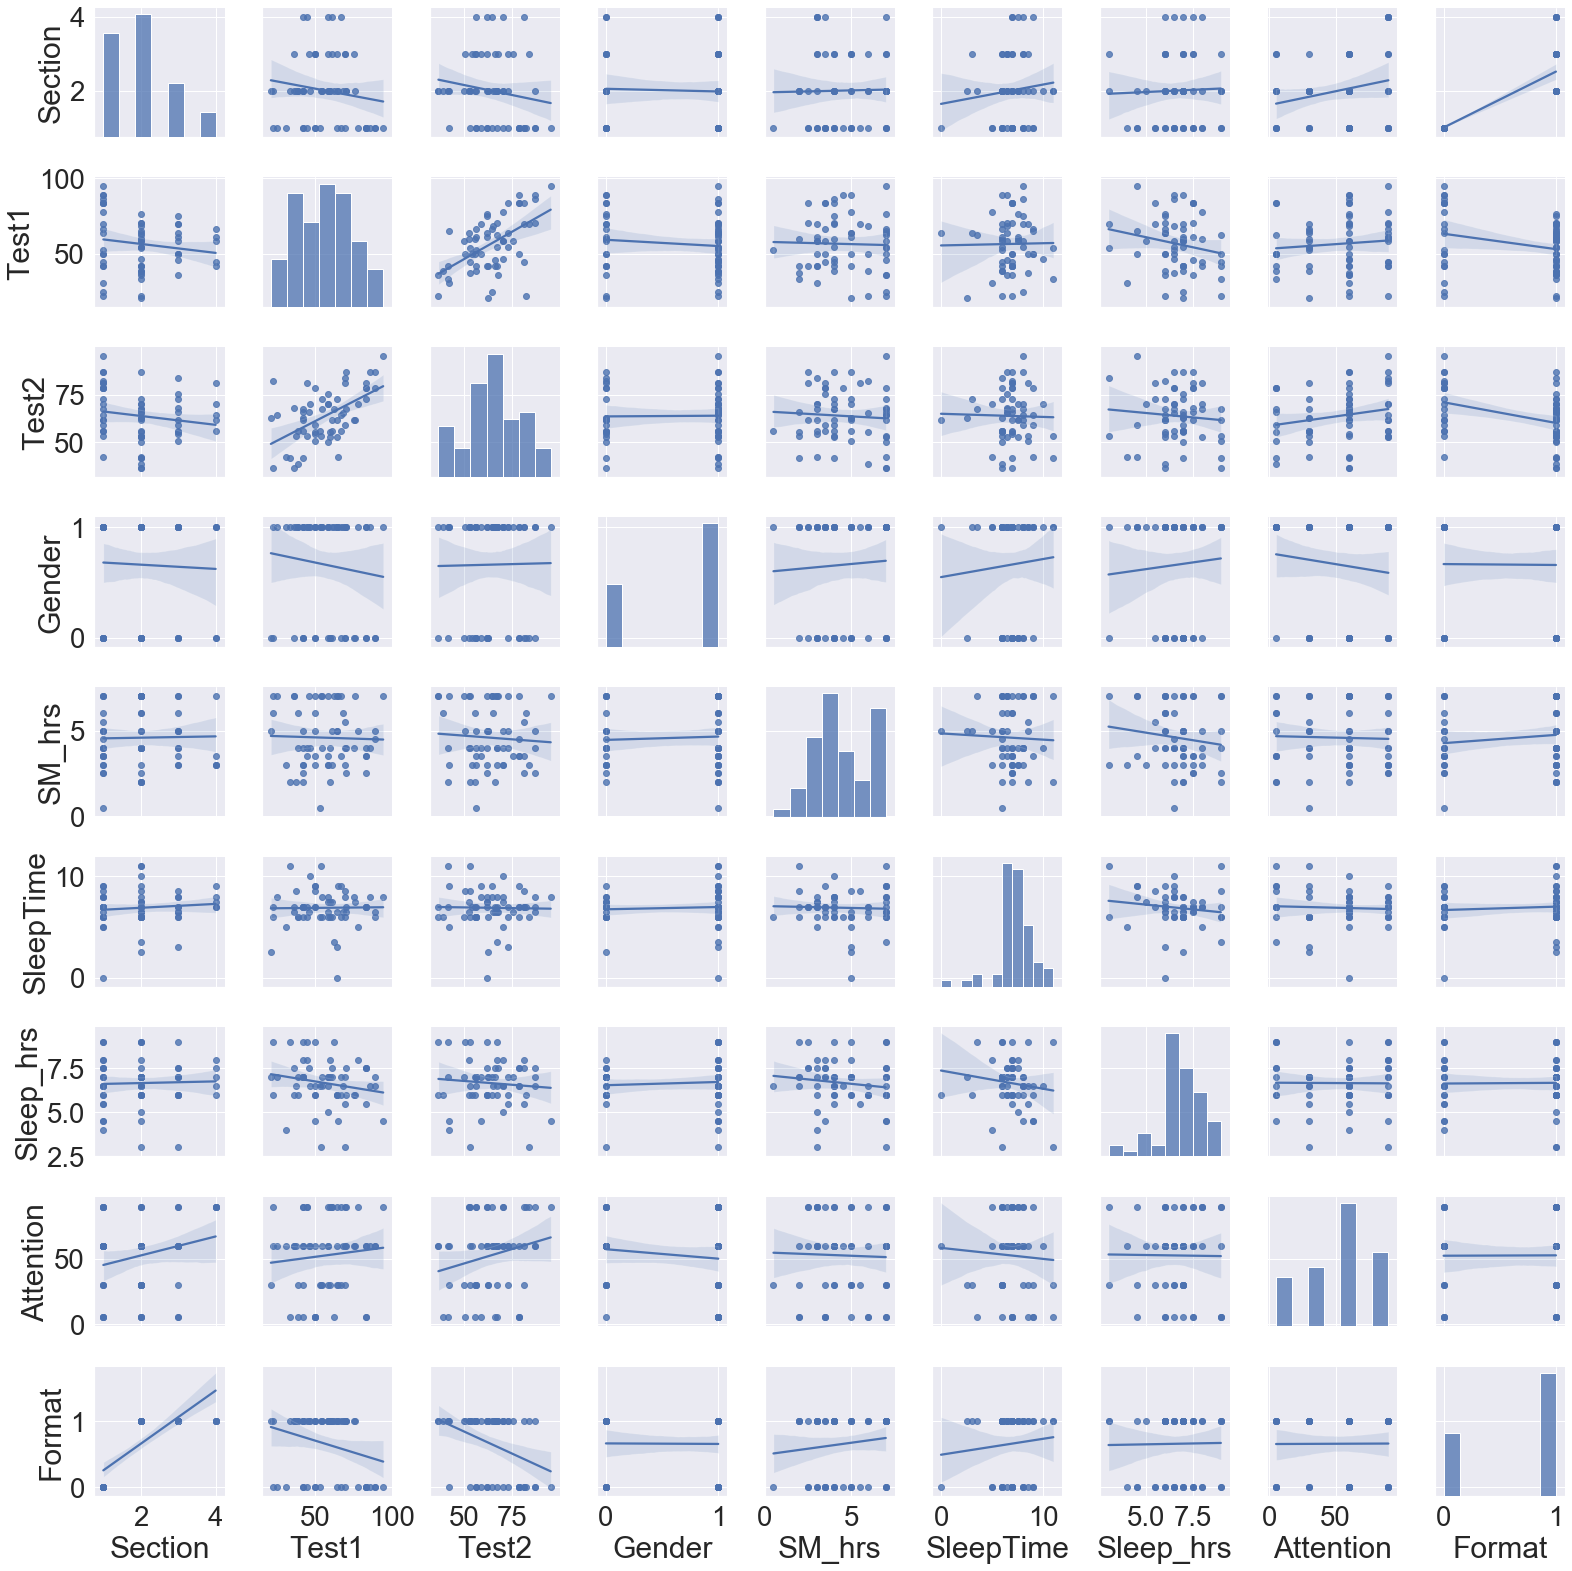

In [17]:
import seaborn as sns
sns.set(font_scale=2.5)
sns.pairplot(df,kind="reg")
plt.savefig('full_sns_plot.png',type='png',dpi=1000)
#g = sns.PairGrid(df)
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)

In [13]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df.iloc[:,1:].loc[df.Section==1],kind="reg")
plt.savefig('full_sns_plot_offline.png',type='png',dpi=1000)

MemoryError: In RendererAgg: Out of memory

Error in callback <function flush_figures at 0x000002988EE30488> (for post_execute):


KeyboardInterrupt: 

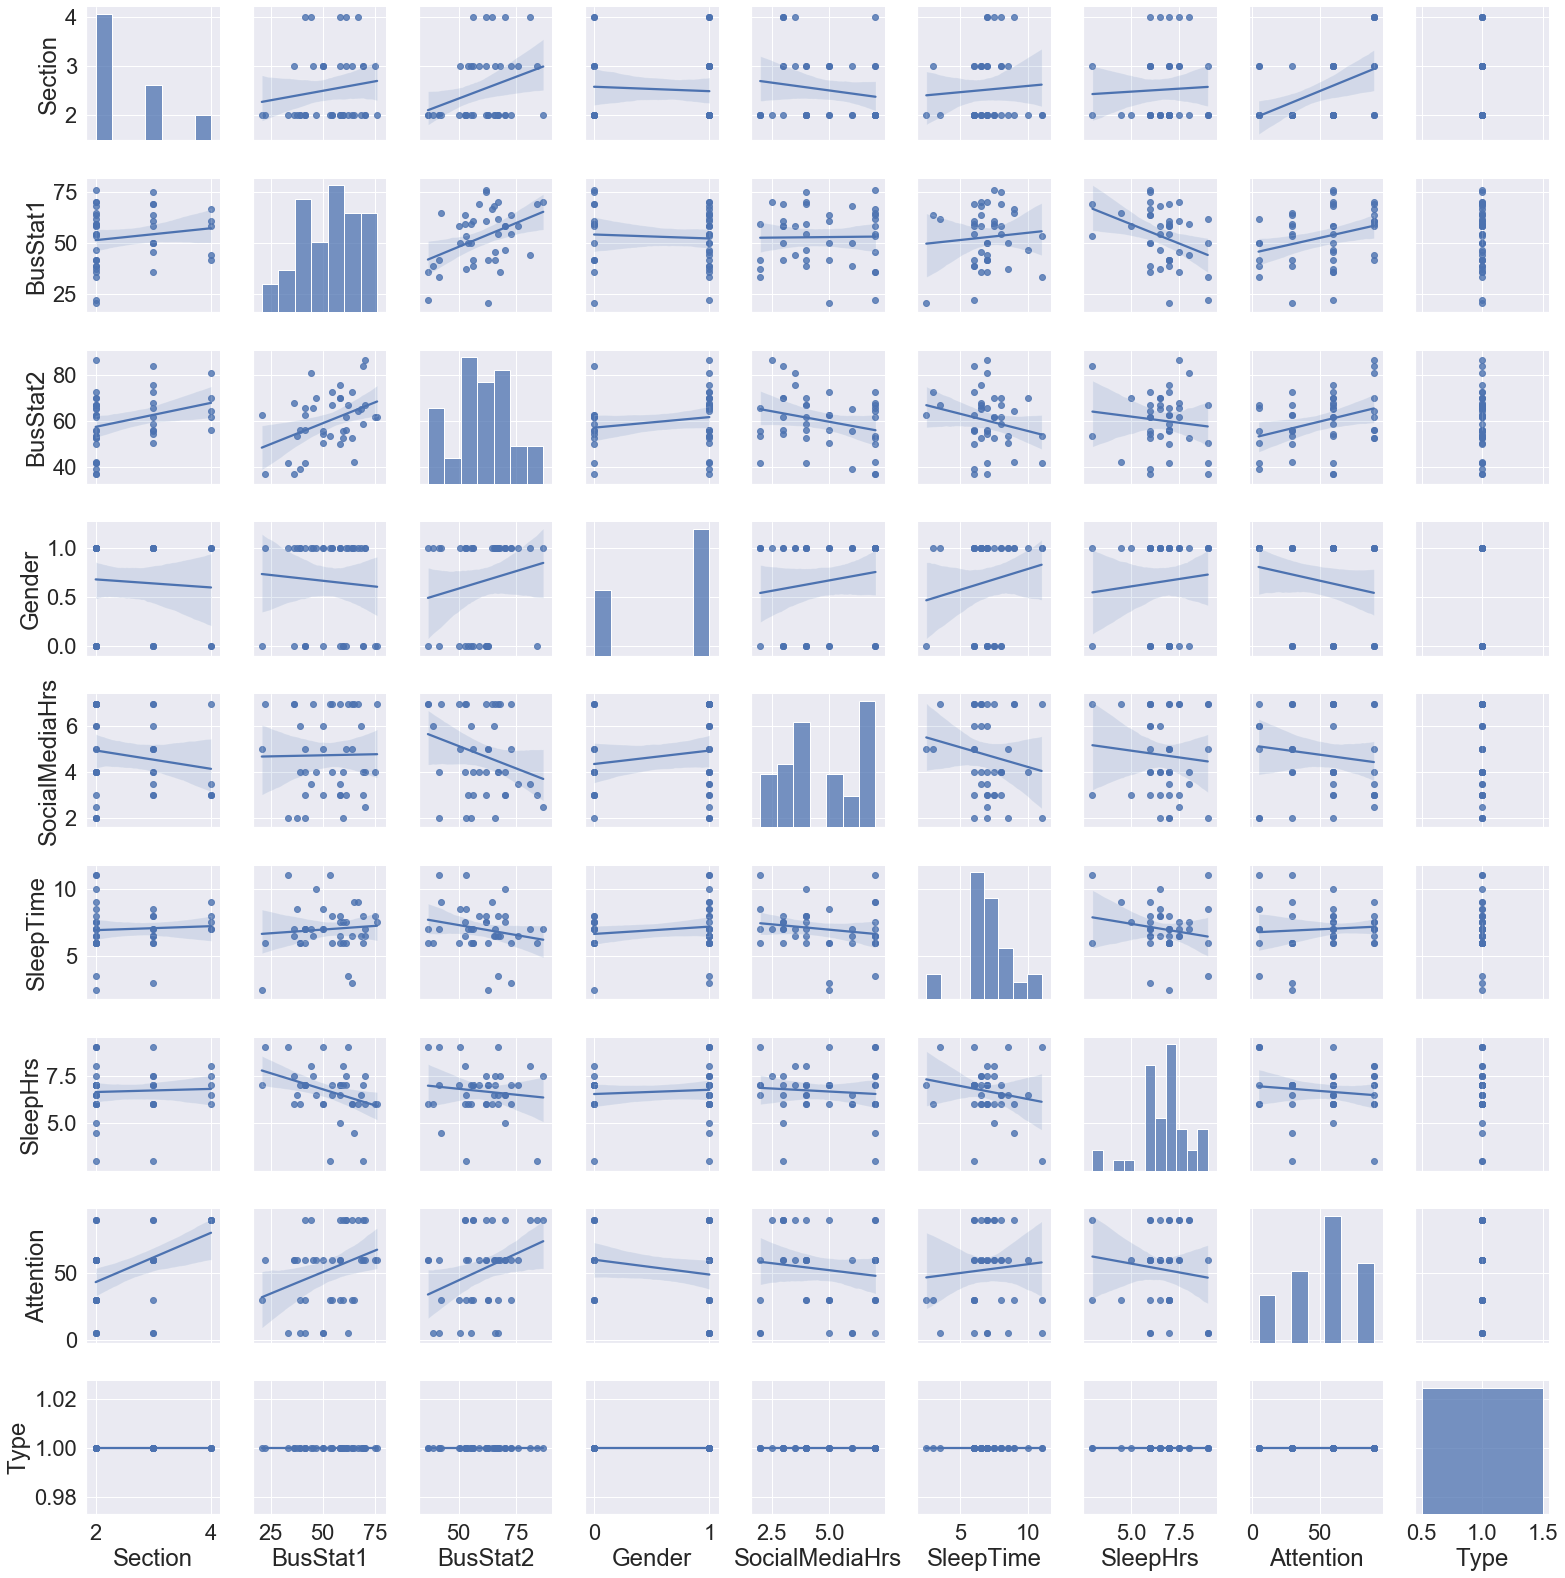

In [11]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df.iloc[:,1:].loc[df.Section!=1],kind="reg")
plt.savefig('full_sns_plot_online.png',type='png',dpi=1000)

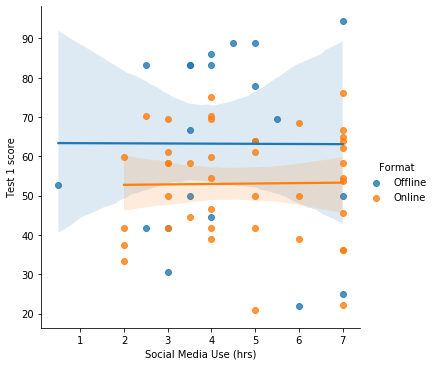

In [8]:
g = sns.lmplot(
    data=df.iloc[:,1:],
    x="SocialMediaHrs", y="BusStat1", hue="Format",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Social Media Use (hrs)", "Test 1 score")

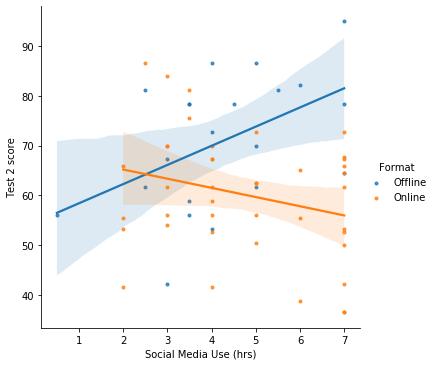

In [27]:
g = sns.lmplot(
    data=df.iloc[:,1:],
    x="SocialMediaHrs", y="BusStat2", hue="Format",
    height=5, markers='.'
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Social Media Use (hrs)", "Test 2 score")
plt.savefig("busstat2_format.png",type="png",dpi=1000)

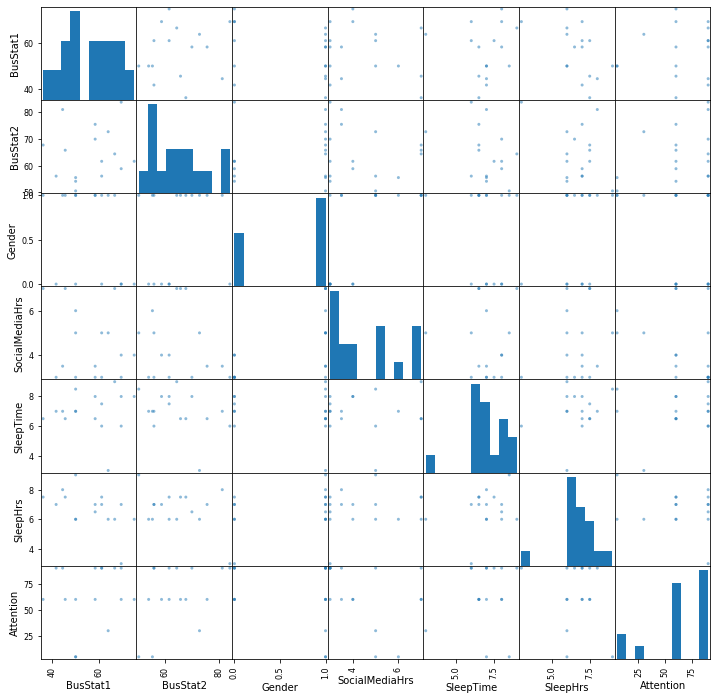

In [114]:
pd.plotting.scatter_matrix(df.iloc[:,1:].loc[np.logical_or(df.Section==3,df.Section==4)],figsize=(12,12))
plt.savefig('statproj_scatter_Section3or4.png',format='png',dpi=1000)

In [12]:
df.corr()

,Section,BusStat1,BusStat2,Gender,SocialMediaHrs,SleepTime,SleepHrs,Attention,Type
Section,1.000000,-0.152104,-0.158837,-0.037213,0.020386,0.100287,0.033757,0.233031,0.781469
BusStat1,-0.152104,1.000000,0.545805,-0.109643,-0.029345,0.014399,-0.194189,0.097193,-0.269346
BusStat2,-0.158837,0.545805,1.000000,0.012801,-0.066579,-0.021644,-0.089672,0.208153,-0.381359
Gender,-0.037213,-0.109643,0.012801,1.000000,0.053128,0.060722,0.066798,-0.119623,-0.008130
SocialMediaHrs,0.020386,-0.029345,-0.066579,0.053128,1.000000,-0.036866,-0.133098,-0.031010,0.132024
SleepTime,0.100287,0.014399,-0.021644,0.060722,-0.036866,1.000000,-0.139528,-0.051787,0.089832
SleepHrs,0.033757,-0.194189,-0.089672,0.066798,-0.133098,-0.139528,1.000000,-0.009515,0.014540
Attention,0.233031,0.097193,0.208153,-0.119623,-0.031010,-0.051787,-0.009515,1.000000,0.004976
Type,0.781469,-0.269346,-0.381359,-0.008130,0.132024,0.089832,0.014540,0.004976,1.000000


In [5]:
sec=1
y='BusStat1'
df_reg=df.loc[df.Section==1]

In [6]:
df_reg

,Section,BusStat1,BusStat2,Gender,SocialMediaHrs,SleepTime,SleepHrs,Attention,Type,Format
0,1,25.000000,64.444444,1,7.0,8.0,7.0,60,0,Offline
1,1,94.444444,95.000000,1,7.0,8.0,4.5,90,0,Offline
2,1,50.000000,78.333333,0,7.0,9.0,6.5,5,0,Offline
3,1,22.000000,82.194444,0,6.0,7.0,6.0,90,0,Offline
4,1,69.444444,81.111111,1,5.5,8.5,5.5,30,0,Offline
5,1,63.888889,61.666667,1,5.0,0.0,6.0,60,0,Offline
6,1,77.777778,70.000000,1,5.0,5.0,8.0,90,0,Offline
7,1,88.888889,86.666667,0,5.0,6.5,7.0,60,0,Offline
8,1,88.888889,78.333333,0,4.5,6.0,6.5,60,0,Offline
9,1,44.444444,53.333333,1,4.0,6.0,9.0,90,0,Offline


In [7]:
lasso = Lasso()

parameters = {"alpha":[1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
reg_out_sec1_lasso=lasso_regression.fit(df_reg[['SocialMediaHrs','SleepTime','SleepHrs','Attention','Gender']].values, df_reg[[y]])
reg_out_sec1_lasso.best_estimator_.coef_

array([ 0.       , -0.       , -0.       , -0.0768004, -0.       ])

In [8]:
lasso_regression.best_params_

{'alpha': 20}

In [9]:
linreg=LinearRegression()
reg_try_sec1=linreg.fit(df_reg[['SleepHrs','Gender']].values.astype(float), df_reg[['SleepTime']])

In [265]:
reg_try_sec1.coef_

array([[-0.08660481, -0.30632319]])

In [273]:
lasso = Lasso(alpha=5)

parameters = {"alpha":[1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
reg_out_sec1_lasso=lasso.fit(df_reg[['SocialMediaHrs','SleepHrs','Attention','Gender']].values, df_reg[[y]])
#reg_out_sec1_lasso.best_estimator_.coef_

AttributeError: 'Lasso' object has no attribute 'best_estimator_'

In [275]:
reg_out_sec1_lasso.coef_

array([-0.39112936, -0.        ,  0.01818945, -0.        ])

In [184]:
linreg=LinearRegression()
reg_out_sec1=linreg.fit(df_reg[['SocialMediaHrs','Attention']].values.astype(float), df_reg.BusStat1)

In [185]:
reg_out_sec1.coef_

array([-2.17325168,  0.02764403])

In [10]:
from statsmodels.regression import linear_model
import statsmodels.api as sm
model = sm.OLS( df_reg[[y]], df_reg[['Attention']].values.astype(float))
results = model.fit()
print(results.params)
print(results.pvalues)
print(results.summary())

x1    0.894716
dtype: float64
x1    0.000008
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               BusStat1   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     35.66
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           7.71e-06
Time:                        08:18:30   Log-Likelihood:                -107.39
No. Observations:                  21   AIC:                             216.8
Df Residuals:                      20   BIC:                             217.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'assists', fig=fig)
plt.savefig('test1offline_resid.png',type=png,dpi=600)

x1    8.080504
x2    0.373211
dtype: float64
x1    0.005673
x2    0.089051
dtype: float64


D:\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [9]:
out=forward_regression(df_reg[['SocialMediaHrs','SleepTime','SleepHrs','Attention','Gender']],df_reg[[y]],threshold_in=0.9,verbose=True)

Add  Gender                         with p-value 0.429885
Add  Attention                      with p-value 0.580821
Add  SleepTime                      with p-value 0.779074


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


In [311]:
from statsmodels.regression import linear_model
model = linear_model.OLS( df_reg[[y]], df_reg[['SocialMediaHrs','Gender']].values.astype(float))
results = model.fit()
print(results.params)
print(results.pvalues)

x1     9.842118
x2    15.173631
dtype: float64
x1    0.000641
x2    0.286491
dtype: float64
